In [ ]:
import cv2
import h5py
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as c
from keras.models import model_from_json
import warnings
import glob
import os
warnings.filterwarnings('ignore')
def load_model():
    # Function to load
    json_file = open('/content/drive/MyDrive/model/Model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights('/content/drive/MyDrive/weight/model_B_weights.h5')
    return loaded_model

def create_img(path):
    #Function to load,normalize and return image 
    print(path)
    im = Image.open(path).convert('RGB')
    
    im = np.array(im)
    
    im = im/255.0
    
    im[:,:,0]=(im[:,:,0]-0.485)/0.229
    im[:,:,1]=(im[:,:,1]-0.456)/0.224
    im[:,:,2]=(im[:,:,2]-0.406)/0.225


    im = np.expand_dims(im,axis  = 0)
    return im

def predict(path):
    #Function to load image,predict heat map, generate count and return (count , image , heat map)
    model = load_model()
    image = create_img(path)
    ans =   model.predict(image)
    count = np.sum(ans)
    return count,image,ans
    



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ans,img,hmap = predict('/content/drive/MyDrive/ShanghaiTech_A_Test/images/IMG_20.jpg')
print("Predict Count:",ans)

/content/drive/MyDrive/ShanghaiTech_A_Test/images/IMG_20.jpg
Predict Count: 481.35742


In [ ]:
ans,img,hmap = predict('/content/drive/MyDrive/ShanghaiTech_A_Test/images/IMG_20.jpg')
print("Predict Count:",ans)

/content/drive/MyDrive/ShanghaiTech_A_Test/images/IMG_20.jpg
Predict Count: 481.35742


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


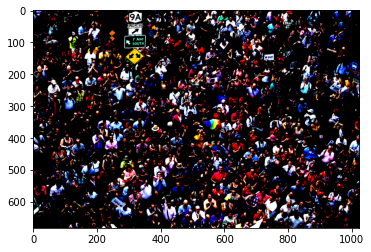

In [ ]:
plt.imshow(img.reshape(img.shape[1],img.shape[2],img.shape[3]))
plt.show()

In [ ]:
ans,img,hmap = predict('/content/drive/MyDrive/stb/IMG_16.jpg')
print("Predict Count:",ans)

/content/drive/MyDrive/stb/IMG_16.jpg
Predict Count: 100.954834


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


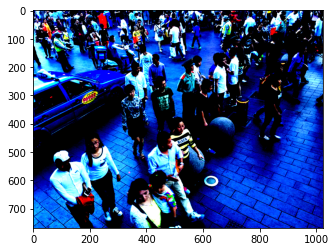

In [ ]:
plt.imshow(img.reshape(img.shape[1],img.shape[2],img.shape[3]))
plt.show()

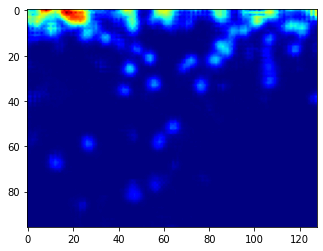

In [ ]:
plt.imshow(hmap.reshape(hmap.shape[1],hmap.shape[2]) , cmap = c.jet )
plt.show()

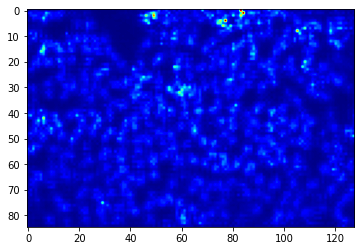

In [ ]:
plt.imshow(hmap.reshape(hmap.shape[1],hmap.shape[2]) , cmap = c.jet )
plt.show()

Original Count :  453


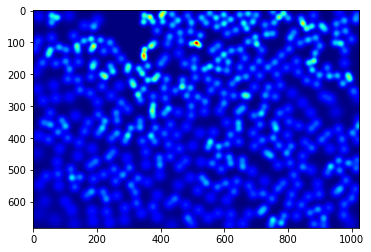

In [ ]:
temp = h5py.File('/content/drive/MyDrive/ShanghaiTech_A_Test/ground-truth-h5/IMG_20.h5' , 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)

In [ ]:
plt.imshow(img.reshape(img.shape[1],img.shape[2],img.shape[3]))
plt.show()

In [ ]:


print("Predict Count:",ans)
#Print count, image, heat map
plt.imshow(img.reshape(img.shape[1],img.shape[2],img.shape[3]))
plt.show()
plt.imshow(hmap.reshape(hmap.shape[1],hmap.shape[2]) , cmap = c.jet )
plt.show()


temp = h5py.File('/content/drive/MyDrive/ShanghaiTech_A_Test/ground-truth-h5/IMG_22.h5' , 'r')
temp_1 = np.asarray(temp['density'])
#plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def create_img(path):
    im = Image.open(path).convert('RGB')
    
    im = np.array(im)
    
    im = im/255.0
    
    im[:,:,0]=(im[:,:,0]-0.485)/0.229
    im[:,:,1]=(im[:,:,1]-0.456)/0.224
    im[:,:,2]=(im[:,:,2]-0.406)/0.225


    im = np.expand_dims(im,axis  = 0)
    return im


part_A_test = '/content/drive/MyDrive/ShanghaiTech_A_Test/images/'

path_sets = [part_A_test]
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
#print(len(img_paths))

model = load_model()
name = []
y_true = []
y_pred = []

for image in img_paths:
    name.append(image)
    gt = h5py.File(image.replace('.jpg','.h5').replace('images','ground-truth-h5') )
    groundtruth = np.asarray(gt['density'])
    num1 = np.sum(groundtruth)
    y_true.append(np.sum(num1))
    img = create_img(image)
    num = np.sum(model.predict(img))
    y_pred.append(np.sum(num))

    
data = pd.DataFrame({'name': name,'y_pred': y_pred,'y_true': y_true})
data.to_csv('ShangaiTech_A_.csv', sep=',')

data = pd.read_csv('ShangaiTech_A_.csv')
y_true = data['y_true']
y_pred = data['y_pred']

mae = mean_absolute_error(np.array(y_true),np.array(y_pred))
print("MAE : " , mae )

MAE :  77.06630221280183
